In [62]:
import sqlite3
import matplotlib.pyplot as pl
import pandas as pd


In [30]:
connection = sqlite3.connect('hipparcos.db')
cursor = connection.cursor()
command = '\
select data.hip,rv,bmag,vmag \
from data \
join photometry on data.hip = photometry.hip \
where rv > 0 \
order by bmag \
limit 20;\
'
cursor.execute(command)
results = cursor.fetchall()


In [32]:
HIPs,RVs,Bs,Vs = tuple(zip(*results))


In [50]:
command = '\
select data.hip,"B-V",vabsmag \
from data \
join photometry on data.hip = photometry.hip \
where e_dist>0 and e_dist<10 and "B-V"!=0 \
order by bmag \
limit 10000;\
'
cursor.execute(command)
results = cursor.fetchall()

In [51]:
HIPs,colors,Vs = tuple(zip(*results))


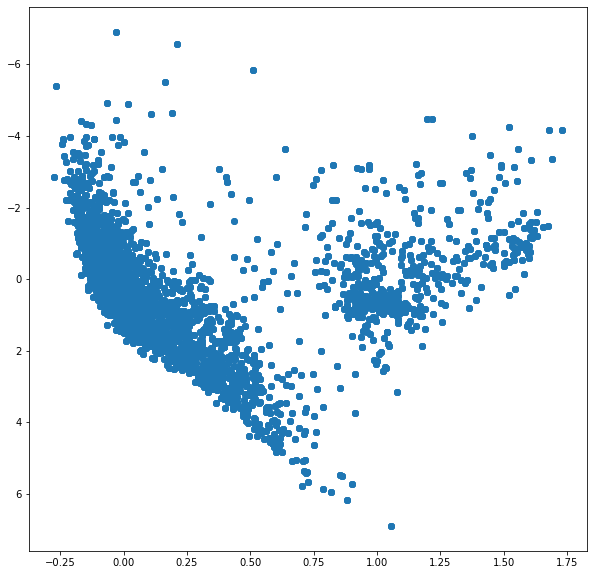

In [54]:
pl.figure(figsize=(10,10))
pl.scatter(colors,Vs,marker='o')
pl.gca().invert_yaxis()

In [59]:
command = '\
select data.hip,"B-V",vabsmag \
from data \
join photometry on data.hip = photometry.hip \
where e_dist>0 and e_dist<10 and "B-V"!=0 and "B-V"<0.7 and vabsmag>10 \
order by bmag \
limit 10000;\
'
cursor.execute(command)
results_wd = cursor.fetchall()

In [60]:
HIPs_wd,colors_wd,Vs_wd = tuple(zip(*results_wd))


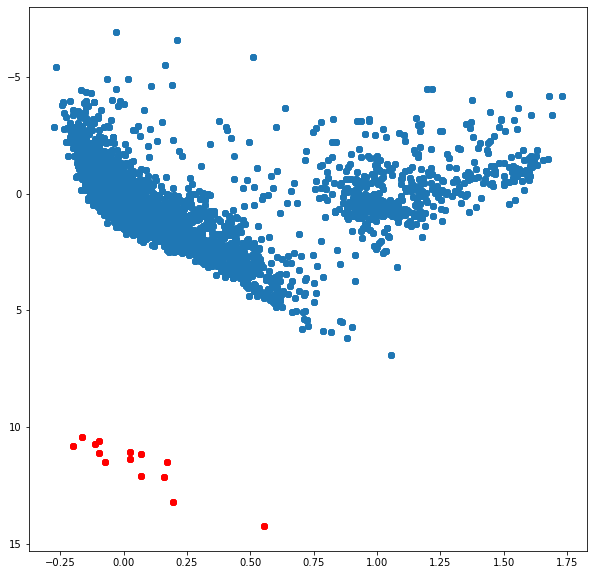

In [61]:
pl.figure(figsize=(10,10))
pl.scatter(colors,Vs,marker='o')
pl.scatter(colors_wd,Vs_wd,marker='o',c='r')

pl.gca().invert_yaxis()